In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/wine_quality/winequality.csv")


In [39]:
X = df_wine.iloc[:,0:-1]
y = df_wine["color"]

In [40]:
feature_names = tuple(X.columns)
feature_names

('fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'good')

In [44]:
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [46]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=3)
sbs = sbs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   49.6s finished

[2023-08-25 19:06:12] Features: 12/1 -- score: 0.9841460545330345[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   39.2s finished

[2023-08-25 19:06:51] Features: 11/1 -- score: 0.9842999480387286[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   29.1s finished

[2023-08-25 19:07:20] Features: 10/1 -- score: 0.9843000191211791[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [47]:
#print("Selected Features :", sbs.k_feature_names_)
sbs.k_feature_names_, sbs.k_feature_idx_

(('fixed acidity',
  'volatile acidity',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'),
 (0, 1, 3, 4, 5, 6, 7, 8, 9, 10))

In [48]:
#df.style.set_properties(**{'text-align': 'left'})
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]

In [49]:
df

,feature_idx,avg_score
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.983222
12,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.984146
11,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12)",0.9843
10,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10)",0.9843
9,"(0, 1, 3, 4, 5, 6, 8, 9, 10)",0.9843
8,"(0, 1, 3, 5, 6, 8, 9, 10)",0.983684
7,"(0, 1, 5, 6, 8, 9, 10)",0.982915
6,"(0, 1, 6, 8, 9, 10)",0.981376
5,"(0, 1, 6, 8, 9)",0.980298
4,"(0, 1, 6, 8)",0.974142


In [50]:
sbs.subsets_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.97737765, 0.99261311, 0.97967667]),
  'avg_score': 0.9832224802515181,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
   'quality',
   'good')},
 12: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.9787627 , 0.99261311, 0.98106236]),
  'avg_score': 0.9841460545330345,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
   'quality',
   'good')},
 11: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12),
  'cv_scores': array([0.97968606, 0.99215143, 0.98106236]),
  'avg_score': 0.9842999480387286,
  'feature_names': ('fixed acidity',
   'volatile ac

Selected Features : ('fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
Selected Features ID : (0, 1, 3, 4, 5, 6, 7, 8, 9, 10)


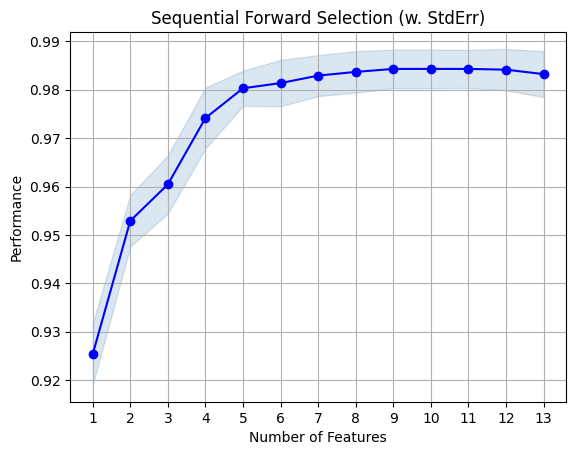

In [51]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Disadvantages of Forward and Backward Feature Selection

Since we know that SFS adds features at each iteration, a problem can occur when we add up a feature that was useful in the beginning, but after adding more ones, is now non-useful. At this point, there’s no way to remove this kind of feature.

The same thing happens to SBS but in the reverse direction—this is because of the inability of SBS to see the usefulness of a feature after being removed from the feature set.

For above reasons, and for more generalization for SBS and SFS, there are two methods that can solve such an issue:

Exhaustive Feature Selection
Recursive Feature Elimination